In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [22]:
#Load gpu price files
gpu_data = "Resources/all_gpu_price.csv"
gpu_df = pd.read_csv(gpu_data).set_index('date')

crypto_data = "Resources/all_crypto_data.csv"
crypto_data_df = pd.read_csv(crypto_data)
crypto_data_df['date'] =  pd.to_datetime(crypto_data_df['date'])
crypto_data_df.set_index('date')
crypto_data_df['weekday'] = crypto_data_df['date'].dt.weekday
crypto_data_df.head(100)

,date,close_btc,close_xrp,close_eth,close_ltc,close_eos,close_dash,weekday
0,2014-12-09,352.19,0.000000,0.0,3.53,0.0,2.50,1
1,2014-12-10,347.94,0.000000,0.0,3.50,0.0,2.50,2
2,2014-12-11,347.68,0.000000,0.0,3.48,0.0,2.50,3
3,2014-12-12,353.40,0.000000,0.0,3.49,0.0,2.50,4
4,2014-12-13,348.24,0.000000,0.0,3.48,0.0,2.50,5
5,2014-12-14,349.35,0.000000,0.0,3.48,0.0,2.50,6
6,2014-12-15,345.37,0.000000,0.0,3.45,0.0,2.50,0
7,2014-12-16,330.22,0.000000,0.0,3.04,0.0,1.60,1
8,2014-12-17,320.02,0.000000,0.0,2.94,0.0,1.60,2
9,2014-12-18,310.34,0.000000,0.0,2.79,0.0,1.60,3


In [3]:
#Creating Data Frames Per GPU Type
# df_1060 = pd.DataFrame({"EVGA 1060": gpu_df['EVGA_1060'],
#                        "ASUS 1060": gpu_df['ASUS_1060'],
#                        "PNY 1060":gpu_df['PNY_1060']}).dropna(how='all')
# df_1070 = pd.DataFrame({"Nvidia 1070": gpu_df['Nvidia_1070'],
#                        "MSI 1070": gpu_df['MSI_1070'],
#                        "EVGA 1070":gpu_df['EVGA_1070']}).dropna(how='all')
# df_1070_ti = pd.DataFrame({"ASUS 1070 Ti": gpu_df['ASUS_1070_Ti'],
#                        "EVGA 1070 Ti": gpu_df['EVGA_1070_Ti'],
#                        "Gigabyte 1070 Ti":gpu_df['Gigabyte_1070_Ti']}).dropna(how='all')
df_1080_ti = pd.DataFrame({"Nvidia 1080 Ti": gpu_df['Nvidia_1080_Ti'],
                       "ASUS 1080 Ti": gpu_df['ASUS_1080_TI'],
                       "Gigabyte 1080 Ti":gpu_df['Gigabyte_1080_Ti']}).dropna(how='all')
# df_580 = pd.DataFrame({"MSI 580": gpu_df['MSI_580'],
#                        "Gigabyte 580": gpu_df['Gigabyte_580'],
#                        "XFX 580":gpu_df['XFX_580']}).dropna(how='all')
# df_56 = pd.DataFrame({"Asus Vega 56": gpu_df['ASUS_Vega_56'],
#                        "MSI Vega 56": gpu_df['MSI_Vega_56'],
#                        "PowerColor Vega 56":gpu_df['PowerColor_Vega_56']}).dropna(how='all')

#Need to set index format same as crypto data df
# df_1060.index =  pd.to_datetime(df_1060.index)
# df_1070.index =  pd.to_datetime(df_1070.index)
# df_1070_ti.index =  pd.to_datetime(df_1070_ti.index)
df_1080_ti.index =  pd.to_datetime(df_1080_ti.index)
# df_580.index =  pd.to_datetime(df_580.index)
# df_56.index =  pd.to_datetime(df_56.index)

In [54]:
#Merge DF's With Crypto Data
# merge_1060 = pd.merge(df_1060, crypto_data_df, on="date", how='left').set_index('date')
# merge_1070 = pd.merge(df_1070, crypto_data_df, on="date", how='left').set_index('date')
# merge_1070_ti = pd.merge(df_1070_ti, crypto_data_df, on="date", how='left').set_index('date')
merge_1080_ti = pd.merge(df_1080_ti, crypto_data_df, on="date", how='left').set_index('date')
# merge_580 = pd.merge(df_580, crypto_data_df, on="date", how='left').set_index('date')
# merge_56 = pd.merge(df_56, crypto_data_df, on="date", how='left').set_index('date')
merge_1080_ti.head()
only_mondays_df = merge_1080_ti[merge_1080_ti['weekday'] == 1]
pct_chg_df = only_mondays_df.pct_change()
pct_chg_df.head()

,Nvidia 1080 Ti,ASUS 1080 Ti,Gigabyte 1080 Ti,close_btc,close_xrp,close_eth,close_ltc,close_eos,close_dash,weekday
date,,,,,,,,,,
2017-03-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-21,-0.043382,NaN,NaN,-0.098018,0.067293,0.493002,-0.019185,NaN,0.118486,0.0
2017-03-28,-0.036047,NaN,NaN,-0.068555,0.400293,0.177642,0.026895,NaN,-0.106240,0.0
2017-04-04,-0.012063,NaN,NaN,0.093210,2.965445,-0.115821,1.135714,NaN,-0.216975,0.0
2017-04-11,0.037851,NaN,NaN,0.069165,-0.124373,-0.015530,0.076923,NaN,-0.113199,0.0


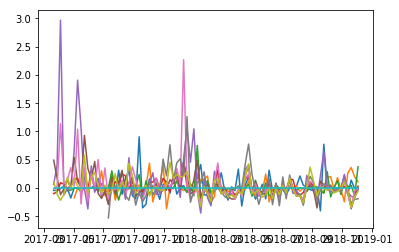

In [55]:
plt.plot(pct_chg_df)